****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [3]:
wb_projects = pd.read_json('data/world_bank_projects.json')

### Top 10 Countries by Number of Projects
****
In order to find the top 10 countries by number of projects, we slice our dataframe wb_projects by 'countryshortname' (to make it more readable) and use the DataFrame.value_counts() method to count the number of occurences of each country name and sort in descending order.
****
Slicing from [0:10] returns the first 10 countries in this list.

In [4]:
top_10_countries = wb_projects['countryshortname'].value_counts()[0:10]
top_10_countries

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

### Top 10 Major Project Themes
****
Because projects can have multiple themes, we can't simply count the values occuring in the 'mjtheme_namecode' column of wb_projects. So instead, we create a list of all theme codes and their names stored as dictionaries found in the 'mjtheme_namecode' column by using the .sum() method. 

In [5]:
themes = wb_projects['mjtheme_namecode'].sum()

In order to count the frequency of each code in the list of themes we just created, we use defaultdict to initialize a dictionary where the keys will be the codes and the values will be the frequency of each code.
****
Looping through the list of themes we created, we add 1 for each occurence of a code.

In [6]:
from collections import defaultdict, OrderedDict

code_counts = defaultdict(int)

for theme in themes:
    code_counts[int(theme['code'])] += 1
    
code_counts = OrderedDict(sorted(code_counts.items()))

Printing code_counts allows us to see that code '11' is the most frequent theme.

In [7]:
for k, v in code_counts.items():
    print(str(k) + ':', v)

1: 38
2: 199
3: 15
4: 146
5: 77
6: 168
7: 130
8: 210
9: 50
10: 216
11: 250


By plotting the frequency of each code as a bargraph, we can visually inspect the chart to conclude that indeed the most frequent theme has code '11.'

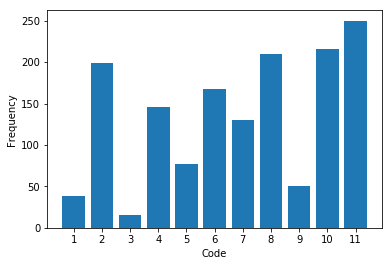

In [8]:
import matplotlib.pyplot as plt

plt.bar(code_counts.keys(), code_counts.values())
plt.xticks(range(1,len(code_counts)+1), code_counts.keys())
plt.xlabel('Code')
plt.ylabel('Frequency')
plt.show()

Now, we want to look up what name corresponds to code '11.' To do this, we create a list of unique elements of themes, themes_filled, by using a temporary dictionary comprehension with the codes as keys and theme as values (returning values from this list gives us precisely the unique themes).

In [18]:
themes

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': ''},
 {'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '6', 'name': ''},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '8', 'name': ''},
 {'code': '10', 'name': 'Rural dev

In [17]:
themes_filled = list({theme['code']:theme for theme in themes}.values())
themes_filled

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '10', 'name': 'Rural development'},
 {'code': '9', 'name': 'Urban development'},
 {'code': '3', 'name': 'Rule of law'}]

Upon inspection, list_themes filled still misses names for codes '1' and '6'. So, we manually inspect list_themes to fill in the appropriate names.

In [11]:
themes_filled[2]['name'] = 'Economic management'
themes_filled[3]['name'] = 'Social protection and risk management'

In [12]:
themes_filled

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '10', 'name': 'Rural development'},
 {'code': '9', 'name': 'Urban development'},
 {'code': '3', 'name': 'Rule of law'}]

Hence, we see "Environment and natural resources management" was the most common major project theme. Now, we will use themes_filled to fill the missing 'name' values in the 'mjtheme_namecode' column.

### Filling in Missing Names
****
To fill in the missing names, we will replace the 'mjtheme_namecode' column of wb_projects with lists calculated from the 'mjthemecode' column and themes_filled.
****
First, we create a dictionary with codes for keys and their name as values. This will make the list comprehension in codename_dict easier to implement by allowing us to look up the correct name based on the corresponding code.

In [13]:
themes_filled_dict = {item['code']:item['name'] for item in themes_filled}

We define a function codename_dict to take a list of codes and create a list of dictionaries containing the corresponding code and name as the values of the dictionaries.

In [14]:
def codename_dict(seq):
    return [{'code':code, 'name':themes_filled_dict[code]} for code in seq]

Since the 'mjthemecode' column is stored as a string, we first turn these values into a list of codes and then transform them using .apply() with the codename_dict function defined above. Finally, we replace the 'mjtheme_namecode' column with this transformed column.

In [20]:
wb_projects['mjtheme_namecode'] = wb_projects['mjthemecode'].str.split(',').apply(codename_dict)

wb_projects now has all missing values in the 'mjtheme_namecode' column filled.